# You work for an e-commerce company, and your task is to group customers into distinct clusters based on their shopping behavior and preferences using the K-Means clustering algorithm. The dataset contains customer information, purchase history, and browsing data. Your goal is to create customer clusters for targeted marketing and personalized recommendations. Answer the following questions based on this case study:

1. Data Exploration:

a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe the features and the data distribution.

b. Discuss the importance of customer clustering in the e-commerce industry.

2. Data Preprocessing:

a. Prepare the customer data for clustering. Discuss the steps involved in data preprocessing, such as scaling, handling missing values, and encoding categorical variables.

3. Implementing K-Means:

a. Implement the K-Means clustering algorithm using Python libraries like scikit-learn to cluster customers based on their features.

b. Choose an appropriate number of clusters (K) for the algorithm and explain your choice.

4. Model Training:

a. Train the K-Means model using the preprocessed customer dataset.

b. Discuss the distance metric used for cluster assignment and its significance in customer clustering

5. Customer Clustering:

a. Assign customers to their respective clusters based on their features.

b. Visualize the customer clusters and analyze the characteristics of each cluster

6. Performance Metrics:

a. Explain the concept of silhouette score and how it is used to evaluate the quality of clustering.

b. Calculate the silhouette score for the customer clusters and Interpret the results.

7. Hyperparameter Tuning:

a. Describe the impact of the number of clusters (K) on the performance of K-Means and suggest strategies for selecting the optimal value of K.

b. Conduct hyperparameter tuning for the K-Means model and discuss the impact of different values of K on clustering results.

8. Real-World Application:

a. Describe the practical applications of customer clustering in the e-commerce industry.

b. Discuss how customer clustering can lead to improved customer engagement, targeted marketing, and personalized recommendations.

9. Model Limitations:

a. Identify potential limitations of the K-Means clustering algorithm in customer segmentation and discuss scenarios in which it may not perform well.

10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the e-commerce company. Highlight the significance of customer clustering and the role of K-Means in personalized marketing.

In [62]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA

In [63]:
data=pd.read_csv('Memberdata.csv')
data.head(5)

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,41904.94792,Other Sauces
1,M09736,6468572,15669800,41904.94792,Cashews
2,M09736,6468572,34989501,41904.94792,Other Dals
3,M09736,6468572,7572303,41904.94792,Namkeen
4,M09736,6468572,15669856,41904.94792,Sugar


In [64]:
data.isna().sum()

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [65]:
data.dropna(inplace=True)

In [66]:
data.isna().sum()

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [67]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

In [68]:
data['Created On'] = data['Created On'].str.replace(' ', '_')

In [69]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

In [70]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data.dropna(inplace=True)
# Encode categorical variables
label_encoder = LabelEncoder()
data['Member'] = label_encoder.fit_transform(data['Member'])
data['Description'] = label_encoder.fit_transform(data['Description'])

#data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Created On'] = label_encoder.fit_transform(data['Created On'])






# cleaning data to the numerical value
print(data.head(10)['Member'])
print(data.head(10)['Description'])
print(data.head(10)['Created On'])

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Member, dtype: int32
0    35
1    11
2    32
3    30
4    48
5     2
6    49
7    36
8    32
9    34
Name: Description, dtype: int32
0    60
1    60
2    60
3    60
4    60
5    60
6    60
7    60
8    60
9    60
Name: Created On, dtype: int32


In [71]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)
print(df_scaled)

[[ 0.         -1.6396132   1.0253682   1.64398127  0.31693029]
 [ 0.         -1.6396132  -0.27630881  1.64398127 -1.03195377]
 [ 0.         -1.6396132   1.02508266  1.64398127  0.14831979]
 ...
 [ 0.          1.03847557 -0.27640479 -0.39693549  0.71035481]
 [ 0.          1.03847557 -0.27639786 -0.39693549 -1.53778529]
 [ 0.          1.03847557 -0.27640453 -0.39693549  0.4293373 ]]


In [73]:
sns.set_style("whitegrid")
sns.set_context("poster")

In [74]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on 

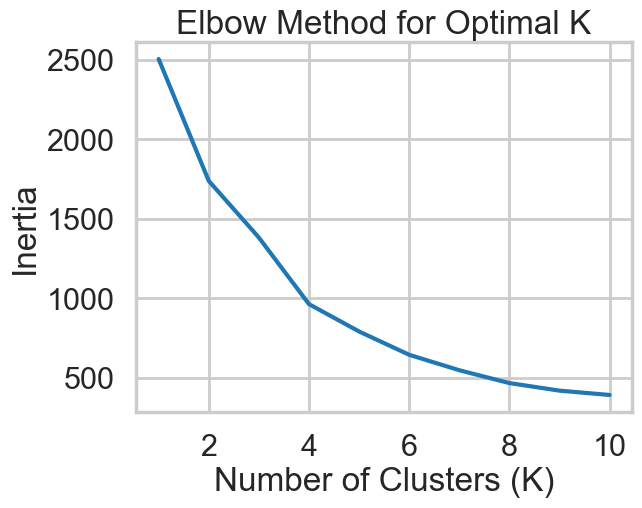

In [75]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [76]:
help(kmeans.inertia_)

Help on float object:

class float(object)
 |  float(x=0, /)
 |  
 |  Convert a string or number to a floating point number, if possible.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __ceil__(self, /)
 |      Return the ceiling as an Integral.
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floor__(self, /)
 |      Return the floor as an Integral.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(self, format_spec, /)
 |      Formats the float according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(sel

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Member       626 non-null    int32
 1   Order        626 non-null    int64
 2   SKU          626 non-null    int64
 3   Created On   626 non-null    int32
 4   Description  626 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 17.2 KB


In [78]:
optimal_k = 4  # Replace with the value you found from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)
print(df['Cluster'])

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0      1
1      1
2      1
3      1
4      1
      ..
621    2
622    0
623    0
624    2
625    0
Name: Cluster, Length: 626, dtype: int32


In [79]:
data.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

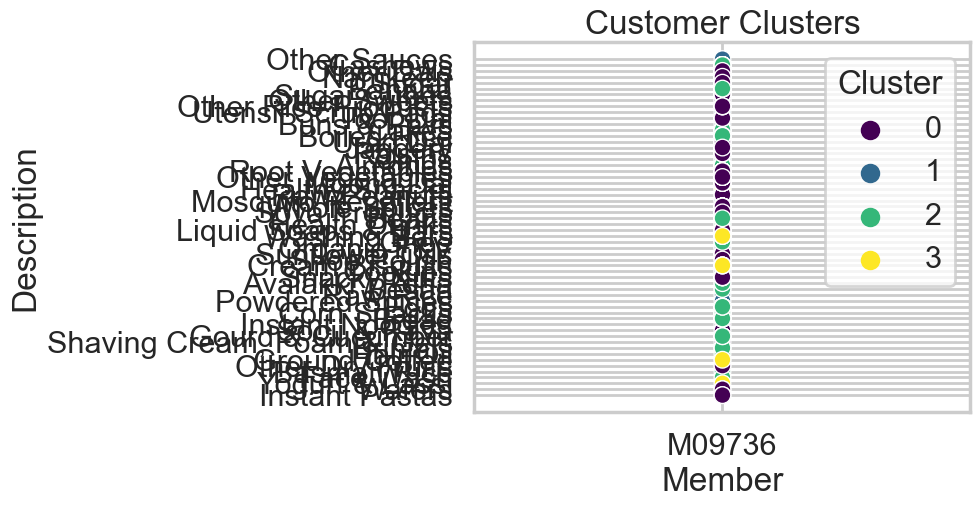

In [83]:
import seaborn as sns

# Assuming you have 'clustered_data' with the cluster labels
sns.scatterplot(data=df, x='Member', y='Description', hue='Cluster', palette='viridis')
plt.title('Customer Clusters')
plt.show()

In [95]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
# To drop the 'Member' column, you can use the following line of code:

df = df.drop('Description', axis=1)

# The 'axis=1' parameter specifies that you want to drop a column. 
# The resulting DataFrame 'df' will no longer contain the 'Member' column.


In [96]:
cluster_means = df.groupby('Cluster').mean()
cluster_medians = df.groupby('Cluster').median()

# Display the mean and median values for each cluster
print("Mean Values for Each Cluster:")
print(cluster_means)

print("\nMedian Values for Each Cluster:")
print(cluster_medians)

Mean Values for Each Cluster:
                Order           SKU
Cluster                            
0        8.110884e+06  1.635437e+07
1        6.647555e+06  1.826660e+07
2        8.017892e+06  1.872476e+07
3        7.729802e+06  9.270685e+07

Median Values for Each Cluster:
             Order         SKU
Cluster                       
0        8104219.0  15669777.0
1        6656240.0  15669814.0
2        8143489.0  15668521.0
3        8059888.5  92436826.0


In [97]:
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.0250861910917143


In [98]:
from sklearn.metrics import silhouette_score

best_score = -1
best_k = -1

for k in range(2, 11):  # Test K from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"Best K: {best_k} with Silhouette Score: {best_score}")

C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on 

Best K: 10 with Silhouette Score: 0.9089446806467586


C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rithika Patil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on 

[0.890390966807739, 0.8446915252455075, 0.875636287993636, 0.8804013160438564, 0.882284291005269, 0.9020925158987576, 0.9081067487238582, 0.9065328167840309, 0.9089446806467586]


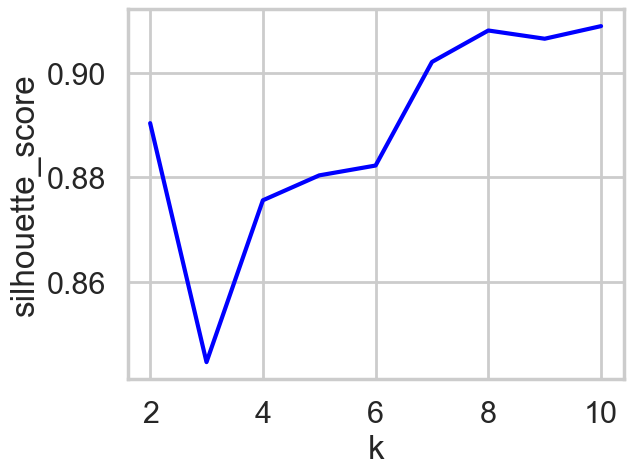

In [99]:
k=list(range(2,11))
ys=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=2)
    km.fit(df)
    labels=km.labels_
    ys.append(silhouette_score(df,labels))

plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('silhouette_score')
print(ys)